# Moving Averge-based Trading Strategy

In [1]:
import requests
import json
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plot
from datetime import datetime
import time

# ----- User Settings 
# coins=['BTC', 'ETH','LTC','MKR','AAVE', 'BAL', 'UNI', 'LDO', 'MATIC','LINK']
coins=['BTC', 'ETH','LTC','LINK']

trading_fee = 0.5/100 
collectDataFrom = pd.Timestamp('2010-01-01')
trading_range = [+0.02,+2]
#buyAbove='sma7d'
#buyAbove='sma50d'
#buyAbove='sma200d'
buyAbove='sma200w'

cryptocompare_api_key='777db0605f662ba6667a0c8d385d317262bd221764d4a3b01dc7a629e9592a49'


# ----- User Settings -- end

coin_colors = {
    'BTC':'orange',
    'ETH':'grey',
    'AAVE':'purple',
    'LTC':'lightblue',
    'MKR':'lightgreen',
    'MATIC':'blue',
    'UNI':'pink',
    'LDO':'darkred',
    'BAL':'brown',
    'LQTY':'teal',
    'BIFI' :'lightgrey',
    'LINK' : 'darkblue'
}

initial_coin = 1
initial_usd = 0
limit=2000

coin_dfs=[]
for coin in coins:
    time_segments = []
    timestamp = pd.Timestamp.now()
    while collectDataFrom <= timestamp : 
        requestString = 'https://min-api.cryptocompare.com/data/v2/histoday?fsym={}&tsym=USD&limit={}&api_key={}&toTs={}'\
        .format(coin, limit, cryptocompare_api_key, timestamp.timestamp())
        # print("Request : " + requestString)    
        response = requests.get(requestString).text 
        parsed = json.loads(response)
        segment_df = pd.DataFrame(parsed['Data']['Data'])
        segment_df['time'] = pd.to_datetime(segment_df['time'], unit='s')
        segment_df.set_index(['time'],inplace=True, verify_integrity = True, drop = True)
        segment_df.sort_index()

        #segment_df.drop_duplicates(inplace=True)
        timestamp = segment_df.first_valid_index() - pd.Timedelta(1, "d") # -1 day        
        #segment_df= segment_df.head(1)
        time_segments.append(segment_df)
          
    df = pd.concat(time_segments, axis=0)
    df = pd.concat({coin: df}, axis=1, names=["Coin", "Metrics"])
    df.drop_duplicates(inplace=True)
    df.drop(columns=['volumefrom','volumeto','conversionType','conversionSymbol'], level='Metrics', inplace=True)
    coin_dfs.append(df)
df=pd.concat(coin_dfs, axis=1)
df=df.loc[collectDataFrom:]
df.sort_index(inplace=True)
df


Coin                BTC                                             ETH  \
Metrics            high          low         open        close     high   
time                                                                      
2010-07-17      0.04951      0.04951      0.04951      0.04951      NaN   
2010-07-18      0.08585      0.05941      0.04951      0.08584      NaN   
2010-07-19      0.09307      0.07723      0.08584      0.08080      NaN   
2010-07-20      0.08181      0.07426      0.08080      0.07474      NaN   
2010-07-21      0.07921      0.06634      0.07474      0.07921      NaN   
...                 ...          ...          ...          ...      ...   
2022-12-18  16830.84000  16673.02000  16780.55000  16742.74000  1196.43   
2022-12-19  16813.47000  16350.32000  16742.74000  16442.79000  1194.49   
2022-12-20  17028.68000  16404.94000  16442.79000  16901.12000  1228.37   
2022-12-21  16922.92000  16737.80000  16901.12000  16821.13000  1220.46   
2022-12-22  16860.78000  16571.31000  16821.13000  16812.44000  1230.41   

Coin                                     LTC                        LINK  \
Metrics         low     open    close   high    low   open  close   high   
time                                                                       
2010-07-17      NaN      NaN      NaN    NaN    NaN    NaN    NaN    NaN   
2010-07-18      NaN      NaN      NaN    NaN    NaN    NaN    NaN    NaN   
2010-07-19      NaN      NaN      NaN    NaN    NaN    NaN    NaN    NaN   
2010-07-20      NaN      NaN      NaN    NaN    NaN    NaN    NaN    NaN   
2010-07-21      NaN      NaN      NaN    NaN    NaN    NaN    NaN    NaN   
...             ...      ...      ...    ...    ...    ...    ...    ...   
2022-12-18  1172.99  1187.11  1183.19  65.90  63.10  64.92  64.42  6.061   
2022-12-19  1152.43  1183.19  1167.68  65.03  61.04  64.42  63.39  6.067   
2022-12-20  1163.29  1167.68  1216.96  66.60  63.12  63.39  65.59  6.119   
2022-12-21  1204.40  1216.96  1213.84  66.80  64.63  65.59  65.43  6.040   
2022-12-22  1183.80  1213.84  1216.68  66.66  64.28  65.43  66.08  6.039   

Coin                             
Metrics       low   open  close  
time                             
2010-07-17    NaN    NaN    NaN  
2010-07-18    NaN    NaN    NaN  
2010-07-19    NaN    NaN    NaN  
2010-07-20    NaN    NaN    NaN  
2010-07-21    NaN    NaN    NaN  
...           ...    ...    ...  
2022-12-18  5.916  6.031  5.950  
2022-12-19  5.680  5.950  5.788  
2022-12-20  5.754  5.788  6.017  
2022-12-21  5.886  6.017  5.990  
2022-12-22  5.854  5.990  6.002  

[4537 rows x 16 columns]

In [2]:
for coin in coins:
    
    # Adding Simple Moving Average Columns
    df.loc(axis=1)[(coin,'sma7d')] = df.loc(axis=1)[(coin,'close')].rolling(7).mean()
    df.loc(axis=1)[(coin,'sma50d')] = df.loc(axis=1)[(coin,'close')].rolling(50).mean()
    df.loc(axis=1)[(coin,'sma200d')] = df.loc(axis=1)[(coin,'close')].rolling(200).mean()
    df.loc(axis=1)[(coin,'sma200w')] = df.loc(axis=1)[(coin,'close')].rolling(200*7).mean()
    # Adding ExponentialMoving Average Columns
    #df.loc(axis=1)[(coin,'ema21w')] = df.loc(axis=1)[(coin,'close')].ewm(span=21*7, adjust=False).mean()
    
    # Setting Initial coins

    df.loc(axis=1)[(coin,'usd_bag')] = initial_usd;
    df.loc(axis=1)[(coin,'coin_bag')] = initial_coin;
df.sort_index(axis=1,inplace=True, level='Coin',sort_remaining=False)
df




Coin                BTC                                                       \
Metrics            high          low         open        close         sma7d   
time                                                                           
2010-07-17      0.04951      0.04951      0.04951      0.04951           NaN   
2010-07-18      0.08585      0.05941      0.04951      0.08584           NaN   
2010-07-19      0.09307      0.07723      0.08584      0.08080           NaN   
2010-07-20      0.08181      0.07426      0.08080      0.07474           NaN   
2010-07-21      0.07921      0.06634      0.07474      0.07921           NaN   
...                 ...          ...          ...          ...           ...   
2022-12-18  16830.84000  16673.02000  16780.55000  16742.74000  17189.470000   
2022-12-19  16813.47000  16350.32000  16742.74000  16442.79000  17080.060000   
2022-12-20  17028.68000  16404.94000  16442.79000  16901.12000  16955.174286   
2022-12-21  16922.92000  16737.80000  16901.12000  16821.13000  16815.140000   
2022-12-22  16860.78000  16571.31000  16821.13000  16812.44000  16737.030000   

Coin                                                                ...  \
Metrics         sma50d      sma200d       sma200w usd_bag coin_bag  ...   
time                                                                ...   
2010-07-17         NaN          NaN           NaN       0        1  ...   
2010-07-18         NaN          NaN           NaN       0        1  ...   
2010-07-19         NaN          NaN           NaN       0        1  ...   
2010-07-20         NaN          NaN           NaN       0        1  ...   
2010-07-21         NaN          NaN           NaN       0        1  ...   
...                ...          ...           ...     ...      ...  ...   
2022-12-18  17530.6766  20499.36010  24264.052436       0        1  ...   
2022-12-19  17446.9194  20429.37590  24273.002593       0        1  ...   
2022-12-20  17375.0906  20365.48000  24282.271793       0        1  ...   
2022-12-21  17301.9078  20300.35825  24291.448279       0        1  ...   
2022-12-22  17235.1500  20234.93095  24300.644993       0        1  ...   

Coin          LTC                                                     \
Metrics      high    low   open  close      sma7d   sma50d   sma200d   
time                                                                   
2010-07-17    NaN    NaN    NaN    NaN        NaN      NaN       NaN   
2010-07-18    NaN    NaN    NaN    NaN        NaN      NaN       NaN   
2010-07-19    NaN    NaN    NaN    NaN        NaN      NaN       NaN   
2010-07-20    NaN    NaN    NaN    NaN        NaN      NaN       NaN   
2010-07-21    NaN    NaN    NaN    NaN        NaN      NaN       NaN   
...           ...    ...    ...    ...        ...      ...       ...   
2022-12-18  65.90  63.10  64.92  64.42  70.980000  68.5018  58.76885   
2022-12-19  65.03  61.04  64.42  63.39  69.145714  68.6620  58.76370   
2022-12-20  66.60  63.12  63.39  65.59  67.461429  68.8734  58.77890   
2022-12-21  66.80  64.63  65.59  65.43  66.041429  69.0798  58.78750   
2022-12-22  66.66  64.28  65.43  66.08  65.135714  69.1824  58.80240   

Coin                                     
Metrics        sma200w usd_bag coin_bag  
time                                     
2010-07-17         NaN       0        1  
2010-07-18         NaN       0        1  
2010-07-19         NaN       0        1  
2010-07-20         NaN       0        1  
2010-07-21         NaN       0        1  
...                ...     ...      ...  
2022-12-18  100.317807       0        1  
2022-12-19  100.328793       0        1  
2022-12-20  100.341786       0        1  
2022-12-21  100.351707       0        1  
2022-12-22  100.363979       0        1  

[4537 rows x 40 columns]

In [3]:


def trade_by_above_ma(row, ma_column='sma7d'):

    isAboveSMA = row['close'] > row[ma_column]
    coin_bag = row['coin_bag']
    usd_bag = row['usd_bag']
    if pd.isna(row['close']):
        return coin_bag, usd_bag 
    if isAboveSMA == True:  # Buy
        if usd_bag>0:
            coin_bag =  row['coin_bag'] + (1-trading_fee) * row['usd_bag']/row['close']  
            usd_bag = 0
    else:                   # Sell
        if coin_bag>0: 
            usd_bag = row['usd_bag'] + (1-trading_fee) * row['coin_bag']*row['close']
            coin_bag = 0
    return coin_bag, usd_bag 
def trade_by_ma_range(row, ma_column='sma7d', trading_range = [-0.1,+0.1] ):
    
    coin_bag = row['coin_bag']
    usd_bag = row['usd_bag']
    if pd.isna(row['close']):
        return coin_bag, usd_bag 
    if row['close'] < (1+trading_range[0])*row[ma_column] :    
        if usd_bag>0:  # Buy
            coin_bag =  row['coin_bag'] + (1-trading_fee) * row['usd_bag']/row['close']  
            usd_bag = 0
    else :
        if row['close'] > (1+trading_range[1])*row[ma_column] :
            if coin_bag>0: # Sell
                usd_bag = row['usd_bag'] + (1-trading_fee) * row['coin_bag']*row['close']
                coin_bag = 0
    return coin_bag, usd_bag 



for coin in coins:
    
    usd_bag=initial_usd
    coin_bag=initial_coin

    for index, row in df[coin].iterrows():

        row['coin_bag'] = coin_bag
        row['usd_bag'] = usd_bag
        #coin_bag, usd_bag = trade_by_above_ma(row, ma_column=buyAbove)
        coin_bag, usd_bag = trade_by_ma_range(row, ma_column=buyAbove, trading_range=trading_range )
        #df[coin].loc[index,'coin_bag'] = coin_bag
        df.loc[index,(coin,'coin_bag')] = coin_bag
        df.loc[index,(coin,'usd_bag')] = usd_bag
        #df[coin].loc[index,'usd_bag'] = usd_bag
    # df[coin]['usd_value'] = df[coin]['usd_bag'] + df[coin]['coin_bag']*df[coin]['close']
    df.loc(axis=1)[(coin,'trade_usd_value')] = df[coin]['usd_bag'] + df[coin]['coin_bag']*df[coin]['close']
    df.loc(axis=1)[(coin,'hodl_usd_value')] = df[coin]['close']*initial_coin + initial_usd
    df.loc(axis=1)[(coin,'trade_success_rate')] = df[coin]['trade_usd_value'] / df[coin]['hodl_usd_value'] 

df.sort_index(axis=1,inplace=True, level='Coin',sort_remaining=False)
df

Coin                BTC                                                       \
Metrics            high          low         open        close         sma7d   
time                                                                           
2010-07-17      0.04951      0.04951      0.04951      0.04951           NaN   
2010-07-18      0.08585      0.05941      0.04951      0.08584           NaN   
2010-07-19      0.09307      0.07723      0.08584      0.08080           NaN   
2010-07-20      0.08181      0.07426      0.08080      0.07474           NaN   
2010-07-21      0.07921      0.06634      0.07474      0.07921           NaN   
...                 ...          ...          ...          ...           ...   
2022-12-18  16830.84000  16673.02000  16780.55000  16742.74000  17189.470000   
2022-12-19  16813.47000  16350.32000  16742.74000  16442.79000  17080.060000   
2022-12-20  17028.68000  16404.94000  16442.79000  16901.12000  16955.174286   
2022-12-21  16922.92000  16737.80000  16901.12000  16821.13000  16815.140000   
2022-12-22  16860.78000  16571.31000  16821.13000  16812.44000  16737.030000   

Coin                                                                 ...  \
Metrics         sma50d      sma200d       sma200w usd_bag  coin_bag  ...   
time                                                                 ...   
2010-07-17         NaN          NaN           NaN     0.0  1.000000  ...   
2010-07-18         NaN          NaN           NaN     0.0  1.000000  ...   
2010-07-19         NaN          NaN           NaN     0.0  1.000000  ...   
2010-07-20         NaN          NaN           NaN     0.0  1.000000  ...   
2010-07-21         NaN          NaN           NaN     0.0  1.000000  ...   
...                ...          ...           ...     ...       ...  ...   
2022-12-18  17530.6766  20499.36010  24264.052436     0.0  3.173573  ...   
2022-12-19  17446.9194  20429.37590  24273.002593     0.0  3.173573  ...   
2022-12-20  17375.0906  20365.48000  24282.271793     0.0  3.173573  ...   
2022-12-21  17301.9078  20300.35825  24291.448279     0.0  3.173573  ...   
2022-12-22  17235.1500  20234.93095  24300.644993     0.0  3.173573  ...   

Coin          LTC                                                              \
Metrics     close      sma7d   sma50d   sma200d     sma200w usd_bag  coin_bag   
time                                                                            
2010-07-17    NaN        NaN      NaN       NaN         NaN     0.0  1.000000   
2010-07-18    NaN        NaN      NaN       NaN         NaN     0.0  1.000000   
2010-07-19    NaN        NaN      NaN       NaN         NaN     0.0  1.000000   
2010-07-20    NaN        NaN      NaN       NaN         NaN     0.0  1.000000   
2010-07-21    NaN        NaN      NaN       NaN         NaN     0.0  1.000000   
...           ...        ...      ...       ...         ...     ...       ...   
2022-12-18  64.42  70.980000  68.5018  58.76885  100.317807     0.0  3.587823   
2022-12-19  63.39  69.145714  68.6620  58.76370  100.328793     0.0  3.587823   
2022-12-20  65.59  67.461429  68.8734  58.77890  100.341786     0.0  3.587823   
2022-12-21  65.43  66.041429  69.0798  58.78750  100.351707     0.0  3.587823   
2022-12-22  66.08  65.135714  69.1824  58.80240  100.363979     0.0  3.587823   

Coin                                                          
Metrics    trade_usd_value hodl_usd_value trade_success_rate  
time                                                          
2010-07-17             NaN            NaN                NaN  
2010-07-18             NaN            NaN                NaN  
2010-07-19             NaN            NaN                NaN  
2010-07-20             NaN            NaN                NaN  
2010-07-21             NaN            NaN                NaN  
...                    ...            ...                ...  
2022-12-18      231.127535          64.42           3.587823  
2022-12-19      227.432077          63.39        

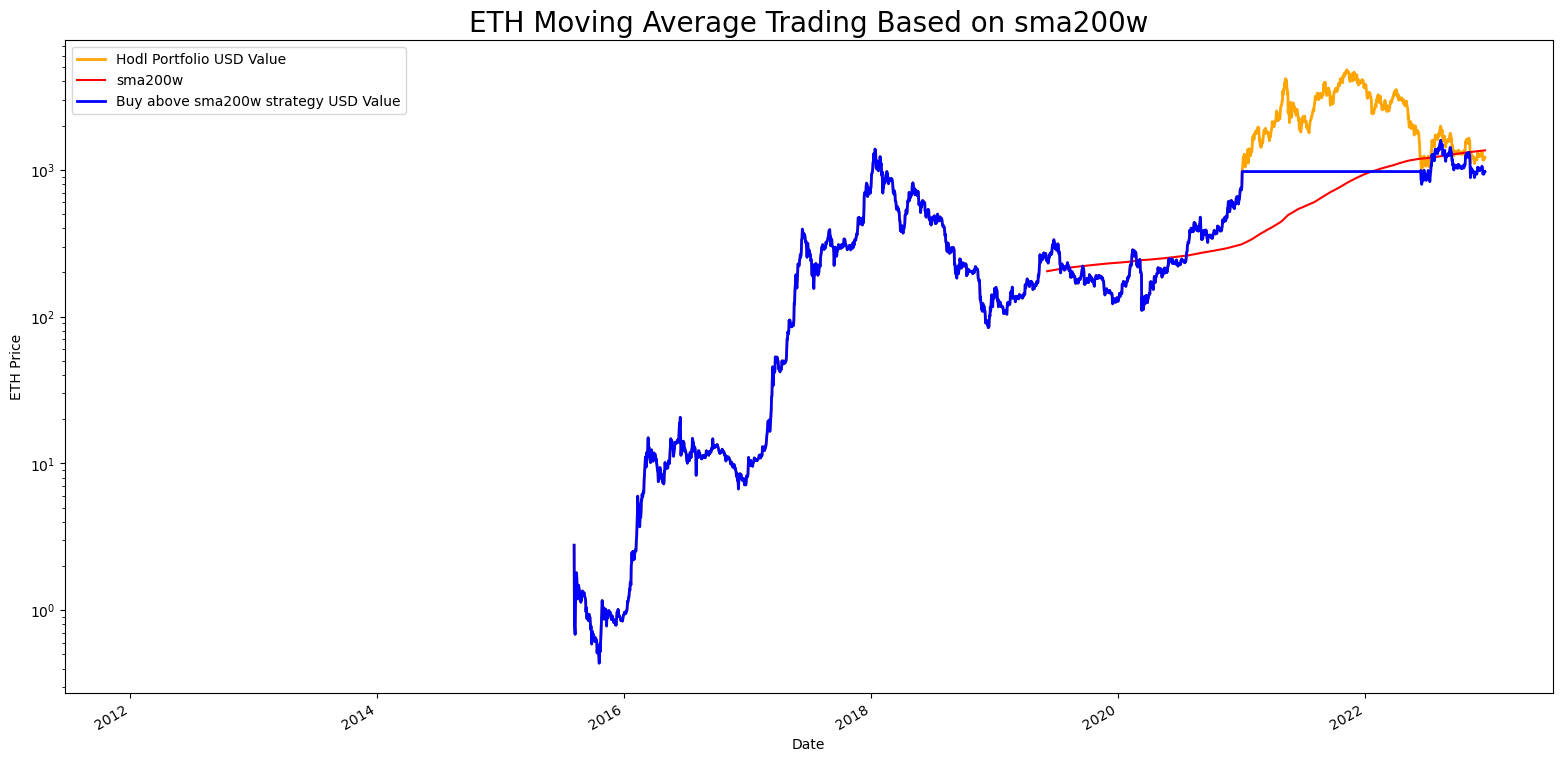

In [6]:
coin='ETH'
df[coin]['close'].plot(c='orange',label='Hodl Portfolio USD Value',linewidth=2)
df[coin][buyAbove].plot(c='red',label=buyAbove)
df[coin]['trade_usd_value'].plot(c='blue',label='Buy above {} strategy USD Value'.format(buyAbove),linewidth=2)


plot.title("{} Moving Average Trading Based on {}".format(coin, buyAbove), fontsize=20)
plot.ylabel("{} Price".format(coin))
plot.xlabel('Date')
plot.legend()
plot.yscale('log')
F = plot.gcf()

# Now check everything with the defaults:
#DPI = F.get_dpi()
#print ("DPI:", DPI)
DefaultSize = F.get_size_inches()
#print ("Default size in Inches", DefaultSize)
#print ("Which should result in a %i x %i Image"%(DPI*DefaultSize[0], DPI*DefaultSize[1]))
# the default is 100dpi for savefig:
#F.savefig("test1.png")
# this gives me a 797 x 566 pixel image, which is about 100 DPI

# Now make the image twice as big, while keeping the fonts and all the
# same size
F.set_size_inches( (DefaultSize[0]*3, DefaultSize[1]*2) )

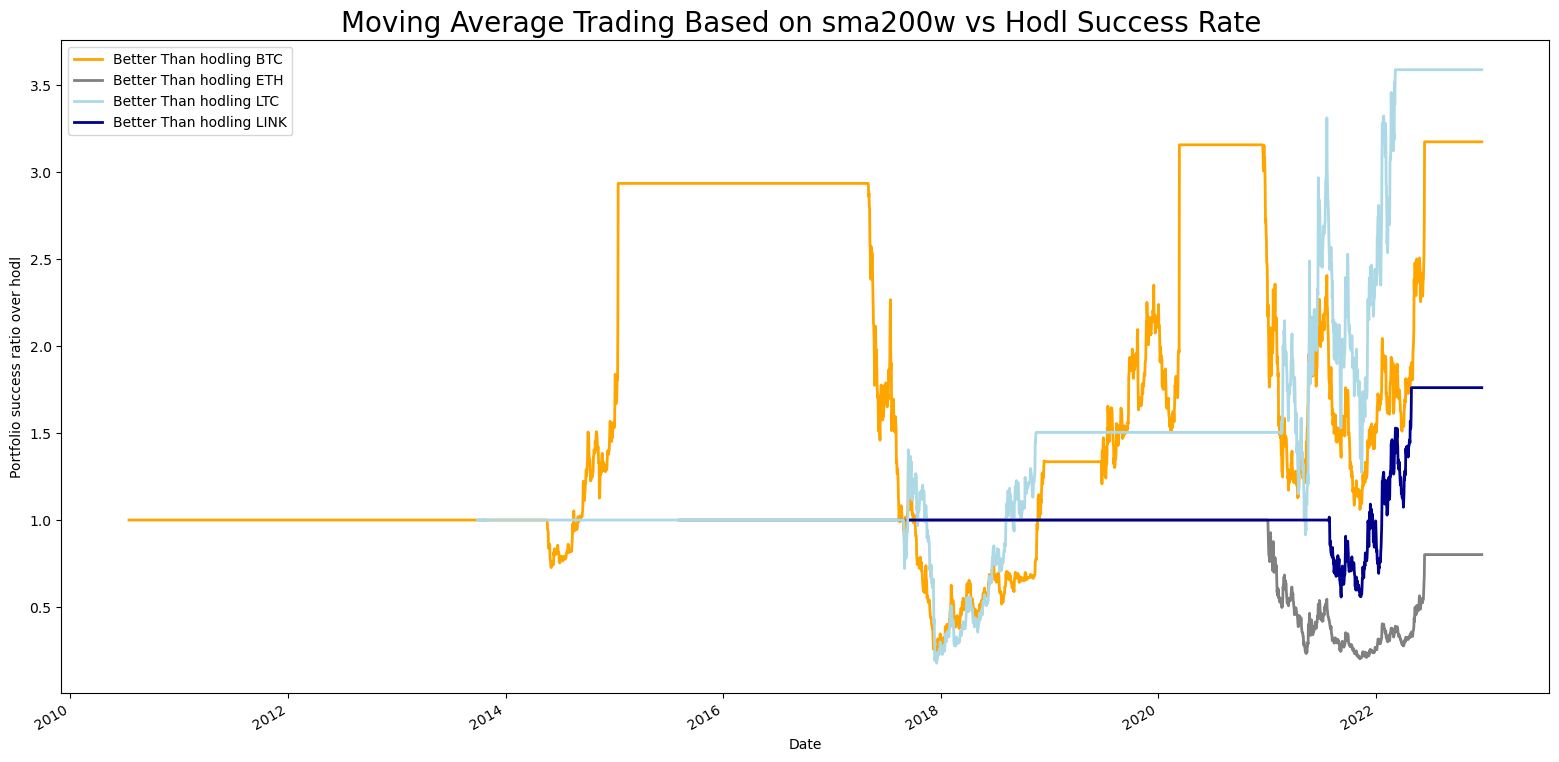

In [5]:

for coin in coins:
    df[coin]['trade_success_rate'].plot(c=coin_colors[coin],label="Better Than hodling {}".format(coin),linewidth=2)

plot.title("Moving Average Trading Based on {} vs Hodl Success Rate ".format(buyAbove), fontsize=20)
plot.ylabel("Portfolio success ratio over hodl")
plot.xlabel('Date')
plot.legend()
F = plot.gcf()
DefaultSize = F.get_size_inches()

F.set_size_inches( (DefaultSize[0]*3, DefaultSize[1]*2) )